In [19]:
from keras.models import Sequential
from keras import layers
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Obtaining Data

In [20]:
train_data=pd.read_csv('train.csv')

test_data=pd.read_csv('test.csv')

print(train_data.head())

print(test_data.head())

          ID   Class
0    377.jpg  MIDDLE
1  17814.jpg   YOUNG
2  21283.jpg  MIDDLE
3  16496.jpg   YOUNG
4   4487.jpg  MIDDLE
          ID
0  25321.jpg
1    989.jpg
2  19277.jpg
3  13093.jpg
4   5367.jpg


In [21]:
train_id=list(train_data['ID'])

In [22]:
train_id[:5]

['377.jpg', '17814.jpg', '21283.jpg', '16496.jpg', '4487.jpg']

In [23]:
test_id=list(test_data['ID'])

In [24]:
test_id[:5]

['25321.jpg', '989.jpg', '19277.jpg', '13093.jpg', '5367.jpg']

In [25]:
train_labels=list(train_data['Class'])

In [26]:
train_labels[:5]

['MIDDLE', 'YOUNG', 'MIDDLE', 'YOUNG', 'MIDDLE']

## Directory Seperation

In [27]:
import os,shutil

In [28]:
original_dir='./'
base_dir='./Augmented'
os.mkdir(base_dir)

In [29]:
train_dir=os.path.join(base_dir,'Train')
os.mkdir(train_dir)
test_dir=os.path.join(base_dir,'Test')
os.mkdir(test_dir)

In [30]:
train_young_dir=os.path.join(train_dir,'YOUNG')
os.mkdir(train_young_dir)
train_middle_dir=os.path.join(train_dir,'MIDDLE')
os.mkdir(train_middle_dir)
train_old_dir=os.path.join(train_dir,'OLD')
os.mkdir(train_old_dir)

In [31]:
originial_dir_train='./Train'
for i in range(len(train_id)):
    if train_labels[i]=='YOUNG':
        src=os.path.join(originial_dir_train,train_id[i])
        dst=os.path.join(train_young_dir,train_id[i])
        shutil.copyfile(src,dst)
    elif train_labels[i]=='MIDDLE':
        src=os.path.join(originial_dir_train,train_id[i])
        dst=os.path.join(train_middle_dir,train_id[i])
        shutil.copyfile(src,dst)
    elif train_labels[i]=='OLD':
        src=os.path.join(originial_dir_train,train_id[i])
        dst=os.path.join(train_old_dir,train_id[i])
        shutil.copyfile(src,dst)

In [32]:
len(os.listdir(train_old_dir))

2396

In [33]:
len(os.listdir(train_middle_dir))

10804

In [34]:
len(os.listdir(train_young_dir))

6706

## Model Selection

In [36]:
acti = 'tanh'
model=Sequential()

model.add(layers.InputLayer(input_shape=(48,48,3)))

model.add(layers.Conv2D(128,(5,5),activation=acti,input_shape=(48,48,3)))

model.add(layers.MaxPool2D(pool_size=(2,2)))

model.add(layers.Dropout(0.5))

model.add(layers.Conv2D(128,(3,3),activation=acti))

model.add(layers.MaxPool2D(pool_size=(2,2)))

model.add(layers.Dropout(0.5))

model.add(layers.Flatten())

model.add(layers.Dense(256,activation=acti))

model.add(layers.Dense(128,activation=acti))

model.add(layers.Dense(3,activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 48, 48, 3)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 44, 44, 128)       9728      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 22, 22, 128)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 22, 22, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 20, 20, 128)       147584    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 10, 128)       0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 10, 10, 128)       0         
__________

In [37]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['acc'])

## Augmentation

In [38]:
from keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(48, 48),
        batch_size=512,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')

Found 19906 images belonging to 3 classes.


In [39]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (512, 48, 48, 3)
labels batch shape: (512, 3)


In [40]:
%%time
hist=model.fit_generator(
      train_generator,
      epochs=20)

Epoch 1/20
39/39 [==============================] - 24s 617ms/step - loss: 1.2623 - acc: 0.4984
Epoch 2/20
39/39 [==============================] - 7s 177ms/step - loss: 0.9689 - acc: 0.5274
Epoch 3/20
39/39 [==============================] - 7s 181ms/step - loss: 0.9574 - acc: 0.5427
Epoch 4/20
39/39 [==============================] - 6s 163ms/step - loss: 0.9591 - acc: 0.5427
Epoch 5/20
39/39 [==============================] - 7s 175ms/step - loss: 0.9573 - acc: 0.5377
Epoch 6/20
39/39 [==============================] - 7s 177ms/step - loss: 0.9567 - acc: 0.5428
Epoch 7/20
39/39 [==============================] - 7s 174ms/step - loss: 0.9563 - acc: 0.5427
Epoch 8/20
39/39 [==============================] - 7s 174ms/step - loss: 0.9575 - acc: 0.5425
Epoch 9/20
39/39 [==============================] - 7s 170ms/step - loss: 0.9560 - acc: 0.5428
Epoch 10/20
39/39 [==============================] - 6s 163ms/step - loss: 0.9575 - acc: 0.5363
Epoch 11/20
39/39 [=============================

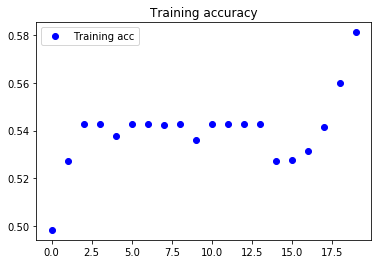

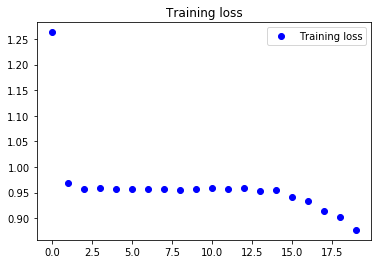

In [41]:
import matplotlib.pyplot as plt

acc = hist.history['acc']
loss = hist.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.title('Training accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [27]:
%%time
train_datagen = ImageDataGenerator(
    rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(48, 48),
        batch_size=512,
        class_mode='categorical')

history = model.fit_generator(
      train_generator,
      steps_per_epoch=39,
      epochs=750)

Found 19906 images belonging to 3 classes.
Epoch 1/750
39/39 [==============================] - 20s 520ms/step - loss: 0.8759 - acc: 0.6030
Epoch 2/750
39/39 [==============================] - 19s 494ms/step - loss: 0.8184 - acc: 0.6226
Epoch 3/750
39/39 [==============================] - 19s 494ms/step - loss: 0.7998 - acc: 0.6314
Epoch 4/750
39/39 [==============================] - 19s 497ms/step - loss: 0.7933 - acc: 0.6379
Epoch 5/750
39/39 [==============================] - 19s 495ms/step - loss: 0.7704 - acc: 0.6520
Epoch 6/750
39/39 [==============================] - 19s 497ms/step - loss: 0.7718 - acc: 0.6536
Epoch 7/750
39/39 [==============================] - 19s 494ms/step - loss: 0.7624 - acc: 0.6593
Epoch 8/750
39/39 [==============================] - 19s 495ms/step - loss: 0.7537 - acc: 0.6633
Epoch 9/750
39/39 [==============================] - 19s 492ms/step - loss: 0.7480 - acc: 0.6652
Epoch 10/750
39/39 [==============================] - 19s 494ms/step - loss: 0.7402 

39/39 [==============================] - 16s 420ms/step - loss: 0.4793 - acc: 0.8050
Epoch 168/750
39/39 [==============================] - 16s 405ms/step - loss: 0.4877 - acc: 0.8008
Epoch 169/750
39/39 [==============================] - 18s 453ms/step - loss: 0.4841 - acc: 0.8021
Epoch 170/750
39/39 [==============================] - 17s 437ms/step - loss: 0.4799 - acc: 0.8027
Epoch 171/750
39/39 [==============================] - 16s 408ms/step - loss: 0.4735 - acc: 0.8027
Epoch 172/750
39/39 [==============================] - 17s 426ms/step - loss: 0.4759 - acc: 0.8042
Epoch 173/750
39/39 [==============================] - 17s 445ms/step - loss: 0.4807 - acc: 0.8034
Epoch 174/750
39/39 [==============================] - 15s 383ms/step - loss: 0.4810 - acc: 0.7993
Epoch 175/750
39/39 [==============================] - 16s 406ms/step - loss: 0.4779 - acc: 0.8035
Epoch 176/750
39/39 [==============================] - 16s 409ms/step - loss: 0.4754 - acc: 0.8028
Epoch 177/750
39/39 [===

39/39 [==============================] - 16s 413ms/step - loss: 0.3895 - acc: 0.8411
Epoch 332/750
39/39 [==============================] - 16s 414ms/step - loss: 0.4057 - acc: 0.8359
Epoch 333/750
39/39 [==============================] - 15s 397ms/step - loss: 0.3991 - acc: 0.8390
Epoch 334/750
39/39 [==============================] - 17s 432ms/step - loss: 0.3951 - acc: 0.8414
Epoch 335/750
39/39 [==============================] - 15s 386ms/step - loss: 0.4023 - acc: 0.8363
Epoch 336/750
39/39 [==============================] - 16s 411ms/step - loss: 0.3934 - acc: 0.8446
Epoch 337/750
39/39 [==============================] - 16s 415ms/step - loss: 0.3922 - acc: 0.8410
Epoch 338/750
39/39 [==============================] - 15s 384ms/step - loss: 0.3974 - acc: 0.8389
Epoch 339/750
39/39 [==============================] - 15s 395ms/step - loss: 0.3956 - acc: 0.8398
Epoch 340/750
39/39 [==============================] - 16s 412ms/step - loss: 0.3887 - acc: 0.8419
Epoch 341/750
39/39 [===

39/39 [==============================] - 18s 449ms/step - loss: 0.3510 - acc: 0.8598
Epoch 496/750
39/39 [==============================] - 15s 384ms/step - loss: 0.3525 - acc: 0.8605
Epoch 497/750
39/39 [==============================] - 16s 399ms/step - loss: 0.3626 - acc: 0.8556
Epoch 498/750
39/39 [==============================] - 15s 381ms/step - loss: 0.3622 - acc: 0.8534
Epoch 499/750
39/39 [==============================] - 17s 430ms/step - loss: 0.3507 - acc: 0.8618
Epoch 500/750
39/39 [==============================] - 15s 386ms/step - loss: 0.3554 - acc: 0.8600
Epoch 501/750
39/39 [==============================] - 17s 433ms/step - loss: 0.3446 - acc: 0.8632
Epoch 502/750
39/39 [==============================] - 17s 431ms/step - loss: 0.3532 - acc: 0.8600
Epoch 503/750
39/39 [==============================] - 17s 435ms/step - loss: 0.3475 - acc: 0.8630
Epoch 504/750
39/39 [==============================] - 16s 413ms/step - loss: 0.3505 - acc: 0.8628
Epoch 505/750
39/39 [===

39/39 [==============================] - 17s 425ms/step - loss: 0.3268 - acc: 0.8720
Epoch 660/750
39/39 [==============================] - 16s 401ms/step - loss: 0.3154 - acc: 0.8744
Epoch 661/750
39/39 [==============================] - 16s 423ms/step - loss: 0.3199 - acc: 0.8754
Epoch 662/750
39/39 [==============================] - 16s 398ms/step - loss: 0.3220 - acc: 0.8733
Epoch 663/750
39/39 [==============================] - 17s 431ms/step - loss: 0.3203 - acc: 0.8727
Epoch 664/750
39/39 [==============================] - 16s 400ms/step - loss: 0.3148 - acc: 0.8763
Epoch 665/750
39/39 [==============================] - 17s 439ms/step - loss: 0.3268 - acc: 0.8707
Epoch 666/750
39/39 [==============================] - 15s 387ms/step - loss: 0.3149 - acc: 0.8758
Epoch 667/750
39/39 [==============================] - 16s 405ms/step - loss: 0.3234 - acc: 0.8720
Epoch 668/750
39/39 [==============================] - 16s 414ms/step - loss: 0.3193 - acc: 0.8740
Epoch 669/750
39/39 [===

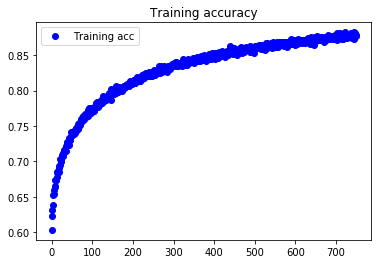

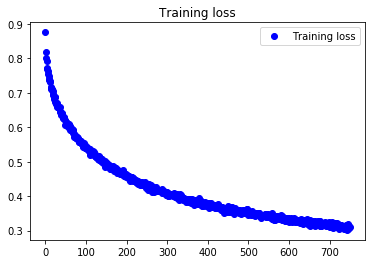

In [28]:
acc = history.history['acc']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.title('Training accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.title('Training loss')
plt.legend()

plt.show()

## Getting Images

In [29]:
from keras.preprocessing.image import load_img
from keras.preprocessing import image

In [30]:
def gettingImages(id,path):
    sample_array=[]
    for i in range(len(id)):
        img_path=path+id[i]
        img=load_img(img_path,target_size=(48,48))
        sample_array.append(image.img_to_array(img))
    return sample_array
        

In [31]:

test_features=gettingImages(test_id,'Test/')

In [32]:

test_features=np.array(test_features)

In [33]:

test_features=test_features/255

## Categorical Conversion

In [34]:
from sklearn.preprocessing import LabelEncoder

In [35]:
import keras

In [36]:
lb=LabelEncoder()

In [37]:
train_label_sample=keras.utils.np_utils.to_categorical(lb.fit_transform(train_labels))

In [38]:
train_label_sample[:10]

array([[1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.]], dtype=float32)

## Model Fitting

In [39]:
predict=model.predict_classes(test_features)

In [40]:
predict

array([0, 2, 2, ..., 0, 0, 2])

In [41]:
answers=lb.inverse_transform(predict)

/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [42]:
answers

array(['MIDDLE', 'YOUNG', 'YOUNG', ..., 'MIDDLE', 'MIDDLE', 'YOUNG'],
      dtype='<U6')

In [43]:
import pandas as pd

In [44]:
df1=pd.DataFrame(test_id,columns=['ID'])

In [45]:
df2=pd.DataFrame(answers,columns=['Class'])

In [46]:
output=pd.concat([df1,df2],axis=1)

In [47]:
output.to_csv('output3.csv',index=False)

In [48]:
output.head()

,ID,Class
0,25321.jpg,MIDDLE
1,989.jpg,YOUNG
2,19277.jpg,YOUNG
3,13093.jpg,MIDDLE
4,5367.jpg,MIDDLE
